In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [10]:
# Define la ruta del dataset
DATASET_DIRECTORY = './preciocasas.xlsx'

# Carga el dataset
data = pd.read_excel(DATASET_DIRECTORY)

# Muestra las primeras filas del dataset para verificar que se haya cargado correctamente
data.head()

,Descripcion,Habitaciones,Baños,Superficie Casa,Superficie Terreno,UF,VistaLago,Sectorcondominio,LugarCentrico
0,CASA Colegios Puerto Varas y Patagonia Puer…,4,4,130,350,6000,False,False,False
1,Casa en Puerto Chico Puerto Varas,2,2,100,250,4950,False,False,False
2,"Parcela ""Graneros de Puerto Varas""",4,4,221,5000,12522,False,True,False
3,"CASA Portal de Molino Viejo, Línea Nueva Pu…",4,3,250,5000,11000,False,True,False
4,CASA LA LAJA Puerto Varas,3,2,140,5000,6609,False,False,True


In [14]:
# Información general del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Descripcion         111 non-null    object
 1   Habitaciones        111 non-null    int64 
 2   Baños               111 non-null    int64 
 3   Superficie Casa     111 non-null    int64 
 4   Superficie Terreno  111 non-null    int64 
 5   UF                  111 non-null    int64 
 6   VistaLago           111 non-null    bool  
 7   Sectorcondominio    111 non-null    bool  
 8   LugarCentrico       111 non-null    bool  
dtypes: bool(3), int64(5), object(1)
memory usage: 5.7+ KB


In [13]:
# Estadísticas descriptivas
data.describe()

,Habitaciones,Baños,Superficie Casa,Superficie Terreno,UF
count,111.000000,111.000000,111.000000,111.000000,111.00000
mean,3.405405,2.783784,173.855856,2743.621622,8061.36036
std,0.743192,0.994580,87.577171,2938.006978,4512.04116
min,1.000000,1.000000,46.000000,154.000000,870.00000
25%,3.000000,2.000000,110.000000,300.000000,5020.00000
50%,4.000000,3.000000,160.000000,660.000000,7652.00000
75%,4.000000,4.000000,212.500000,5000.000000,9950.00000
max,4.000000,4.000000,528.000000,16593.000000,27000.00000


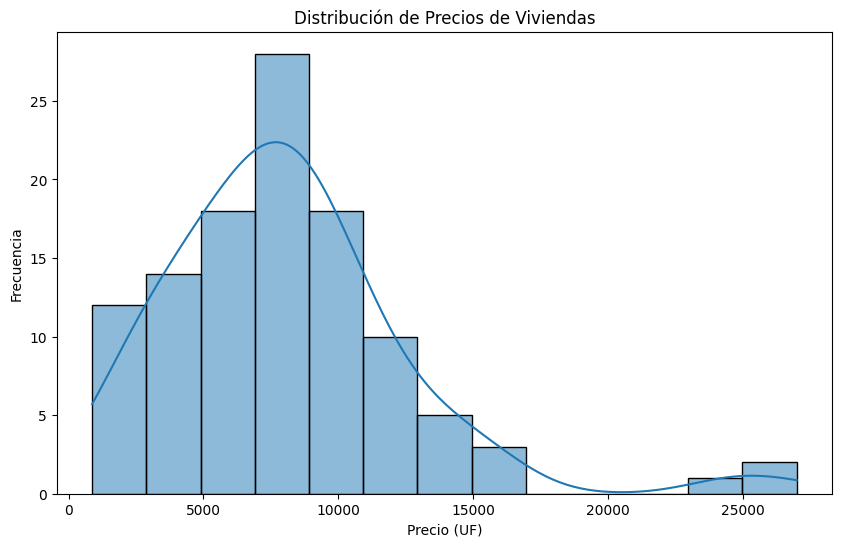

In [15]:
# Visualización de la distribución de precios
plt.figure(figsize=(10, 6))
sns.histplot(data['UF'], kde=True)
plt.title('Distribución de Precios de Viviendas')
plt.xlabel('Precio (UF)')
plt.ylabel('Frecuencia')
plt.show()

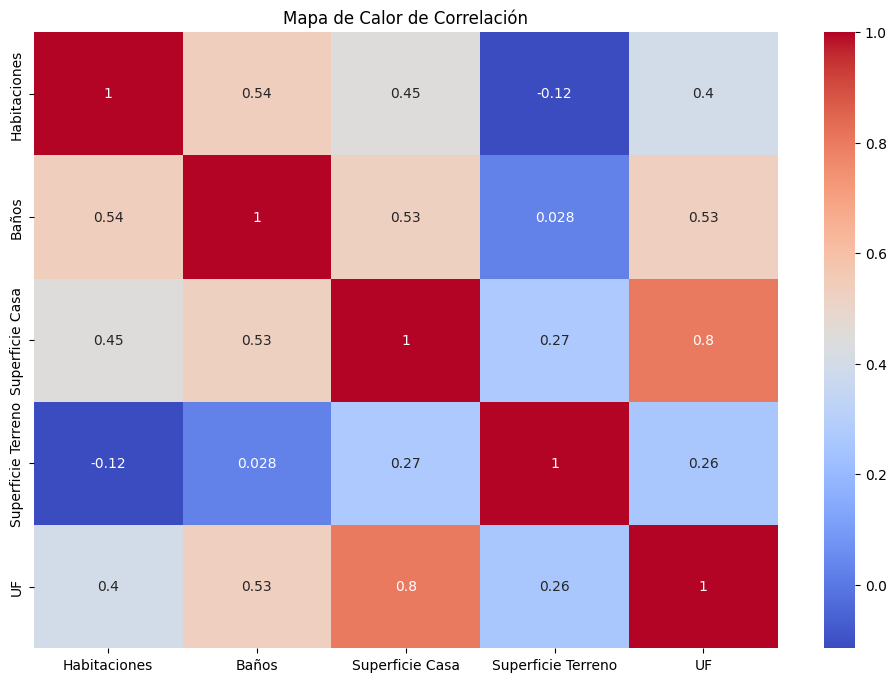

In [16]:
# Visualización de la correlación entre variables numéricas
plt.figure(figsize=(12, 8))
sns.heatmap(data[['Habitaciones', 'Baños', 'Superficie Casa', 'Superficie Terreno', 'UF']].corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

In [17]:
# Convertir variables categóricas (booleanas) a valores numéricos
data['VistaLago'] = data['VistaLago'].astype(int)
data['Sectorcondominio'] = data['Sectorcondominio'].astype(int)
data['LugarCentrico'] = data['LugarCentrico'].astype(int)

In [18]:
# Muestra informacion con datos booleanos convertidos a numericos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Descripcion         111 non-null    object
 1   Habitaciones        111 non-null    int64 
 2   Baños               111 non-null    int64 
 3   Superficie Casa     111 non-null    int64 
 4   Superficie Terreno  111 non-null    int64 
 5   UF                  111 non-null    int64 
 6   VistaLago           111 non-null    int64 
 7   Sectorcondominio    111 non-null    int64 
 8   LugarCentrico       111 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 7.9+ KB


In [19]:
# Seleccionar características y etiqueta
X = data[['Habitaciones', 'Baños', 'Superficie Casa', 'Superficie Terreno', 'VistaLago', 'Sectorcondominio', 'LugarCentrico']]
y = data['UF']

In [20]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Inicializar el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train_scaled, y_train)

# Hacer predicciones
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [24]:
# Evaluar el rendimiento en el conjunto de entrenamiento
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Evaluar el rendimiento en el conjunto de prueba
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Error Cuadrático Medio (MSE) en Entrenamiento: {train_mse}")
print(f"Coeficiente de Determinación (R^2) en Entrenamiento: {train_r2}")
print(f"Error Cuadrático Medio (MSE) en Prueba: {test_mse}")
print(f"Coeficiente de Determinación (R^2) en Prueba: {test_r2}")

Error Cuadrático Medio (MSE) en Entrenamiento: 6483302.207031632
Coeficiente de Determinación (R^2) en Entrenamiento: 0.7152719231135044
Error Cuadrático Medio (MSE) en Prueba: 5332784.732023874
Coeficiente de Determinación (R^2) en Prueba: 0.412963444003138


# Conclusiones
De acuerdo a lo que se mostro en el codigo, el modelo quedo entrenado con los datos ingresados desde el dataset
